In [23]:
import pickle

from matplotlib import pyplot as plt

In [24]:
filenames = [
    'Exclamation Mark Dataset__Random Forest__Exclamation Mark Dataset Family__AbsoluteValues__20250529_134349.pkl',
    'Exclamation Mark Dataset__Logistic Regression__Exclamation Mark Dataset Family__AbsoluteValues__20250529_134349.pkl',
    'Exclamation Mark Dataset__Neural Network__Exclamation Mark Dataset Family__AbsoluteValues__20250529_134349.pkl',
    'Exclamation Mark Dataset__SVM__Exclamation Mark Dataset Family__AbsoluteValues__20250529_134349.pkl',
    'Gummy Worm Dataset__Logistic Regression__Gummy Worm Dataset Family__AbsoluteValues__20250524_140318.pkl',
    'Gummy Worm Dataset__Neural Network__Gummy Worm Dataset Family__AbsoluteValues__20250524_140318.pkl',
    'Gummy Worm Dataset__Random Forest__Gummy Worm Dataset Family__AbsoluteValues__20250524_140318.pkl',
    'Gummy Worm Dataset__SVM__Gummy Worm Dataset Family__AbsoluteValues__20250524_140318.pkl'
]

should_plot_true_ece_grid_15 = [True, False, False, False, False, False, False, False, False]
should_plot_true_ece_grid_100 = [True, False, False, False, False, False, False, False]
should_plot_tce = [False, False, False, False, False, False, False, False]
y_lims = [(0.045, 0.125), (0.005, 0.06), (0, 0.04), (0.01, 0.05), (0.02, 0.14), (0.025, 0.065), (0.004, 0.018), (0.002, 0.01)]

   Plotting...
   Plotting...
   Plotting...
   Plotting...
   Plotting...
   Plotting...
   Plotting...
   Plotting...
   Plotting...
   Plotting...
   Plotting...
   Plotting...
   Plotting...
   Plotting...
   Plotting...
   Plotting...


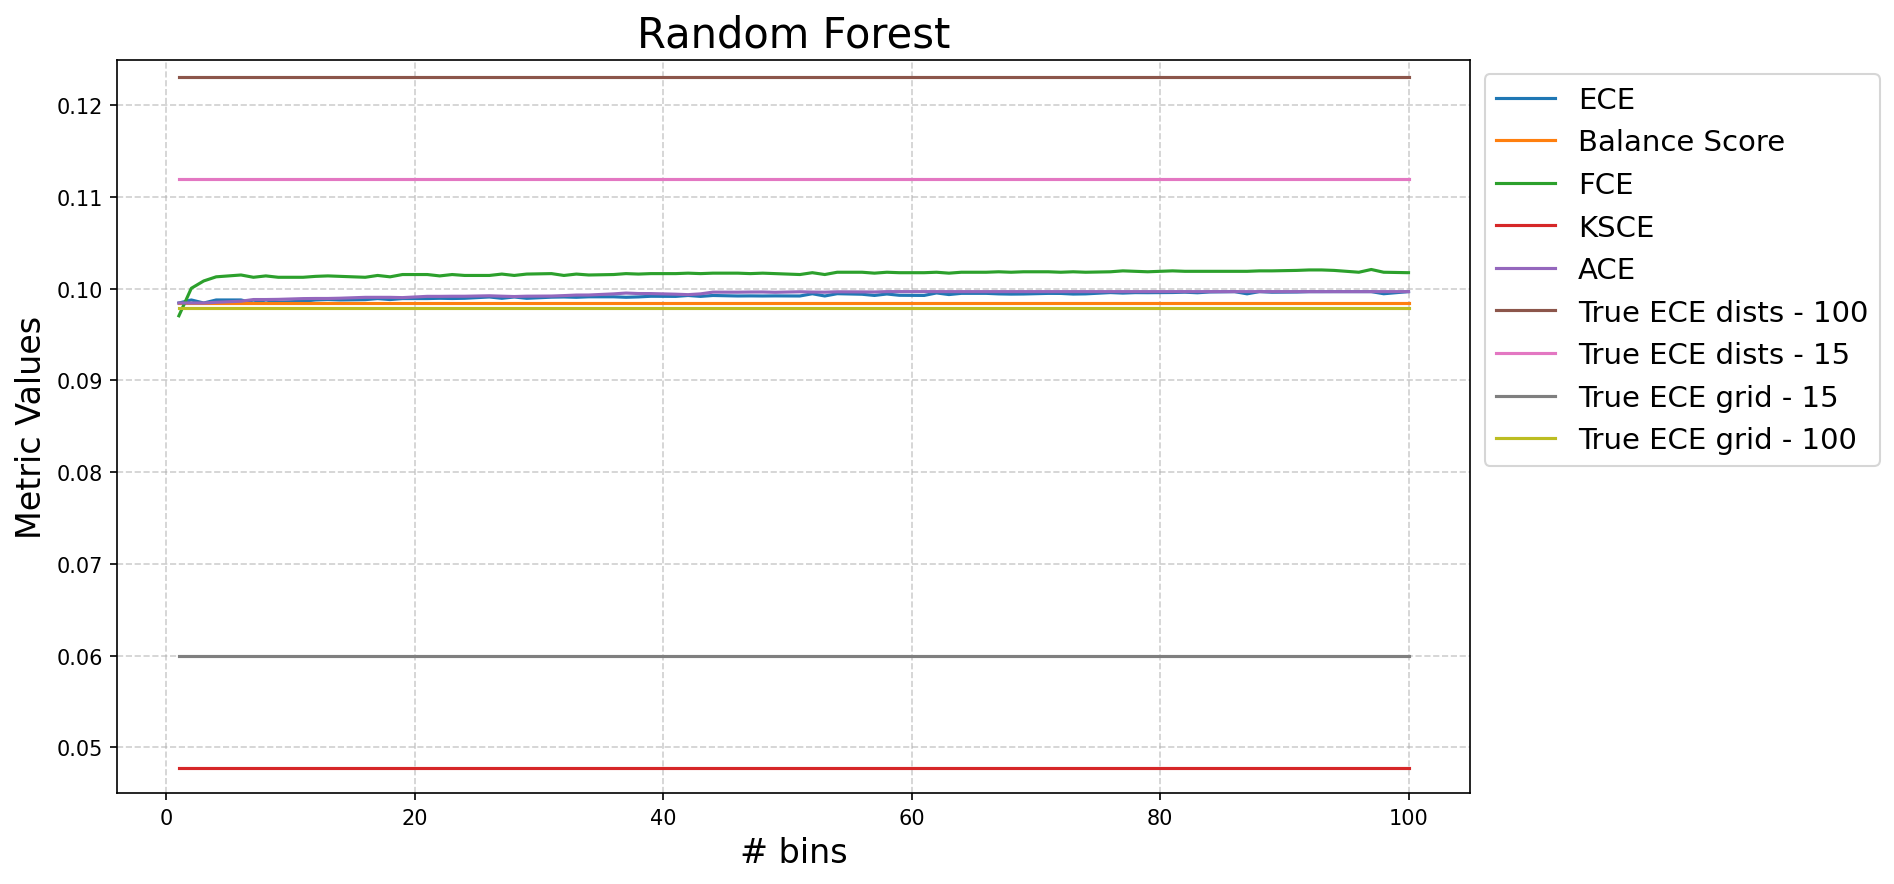

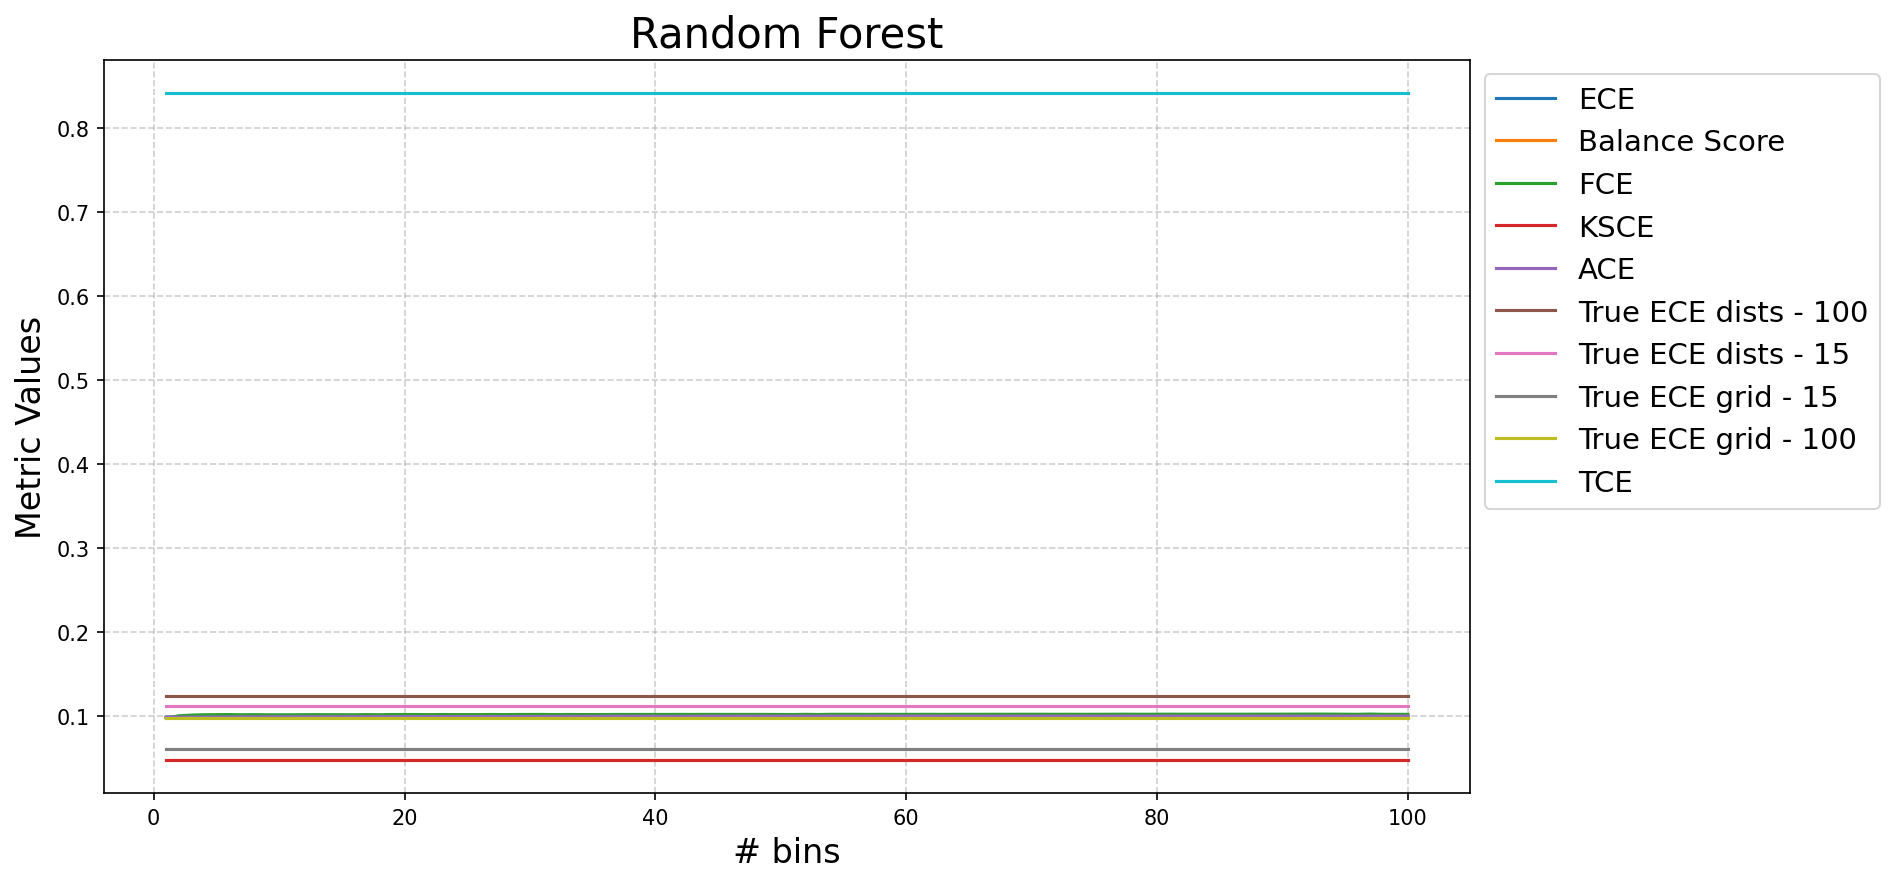

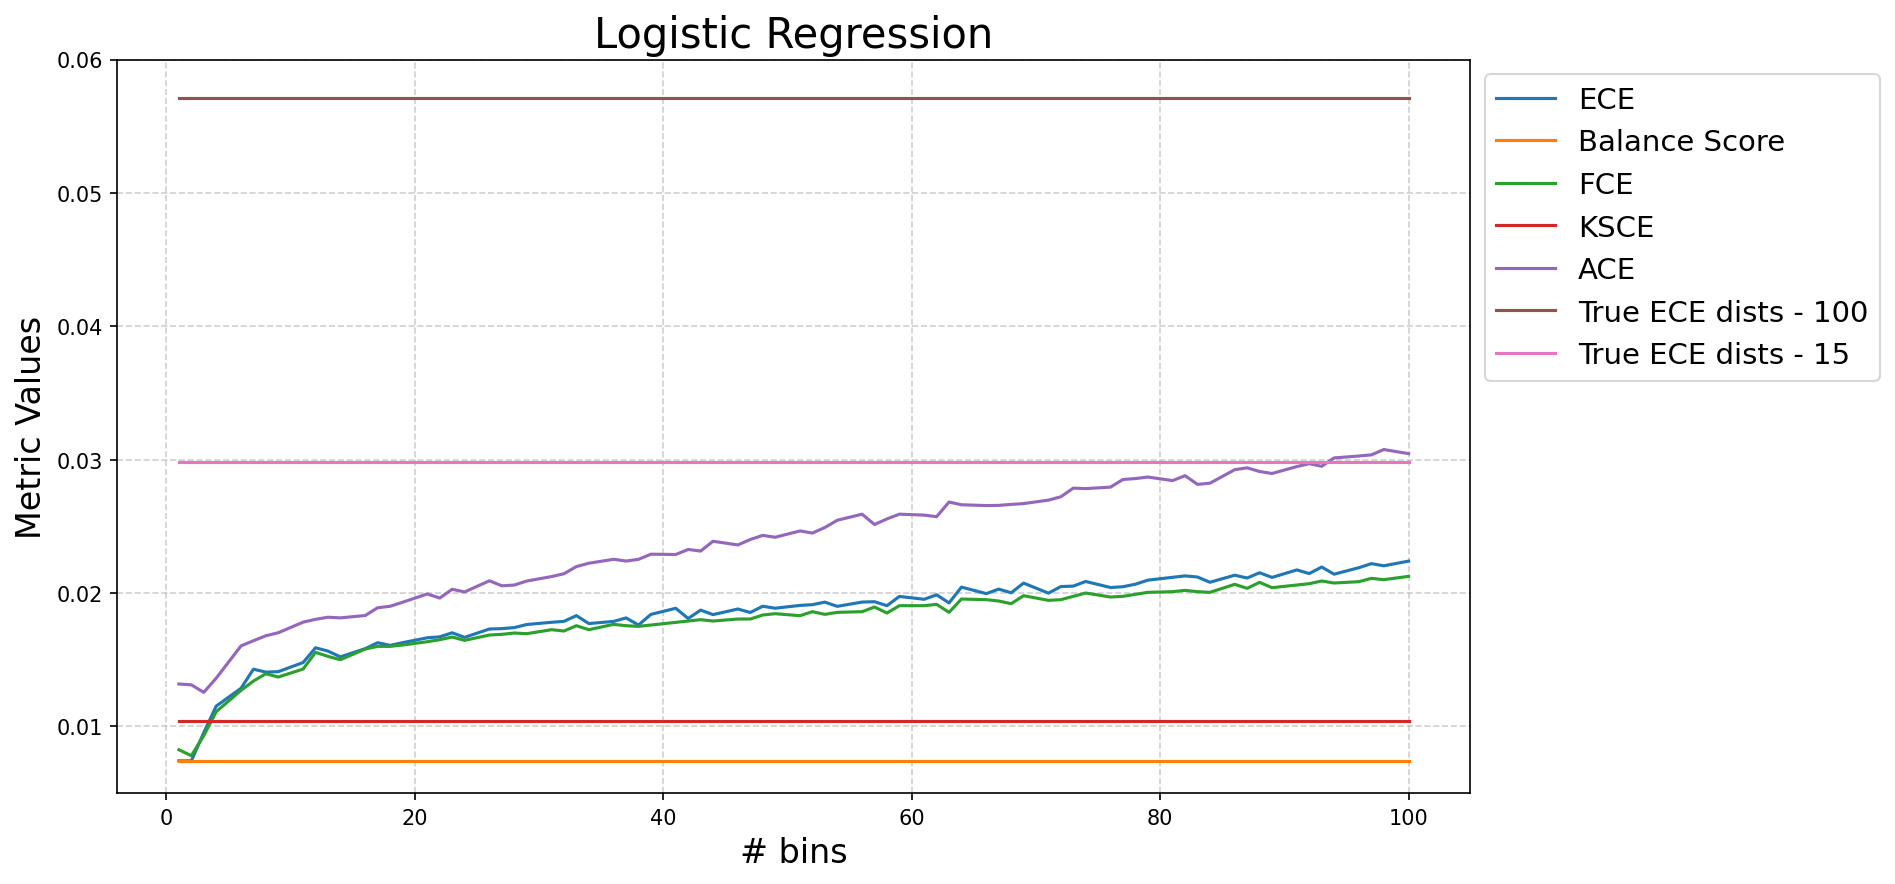

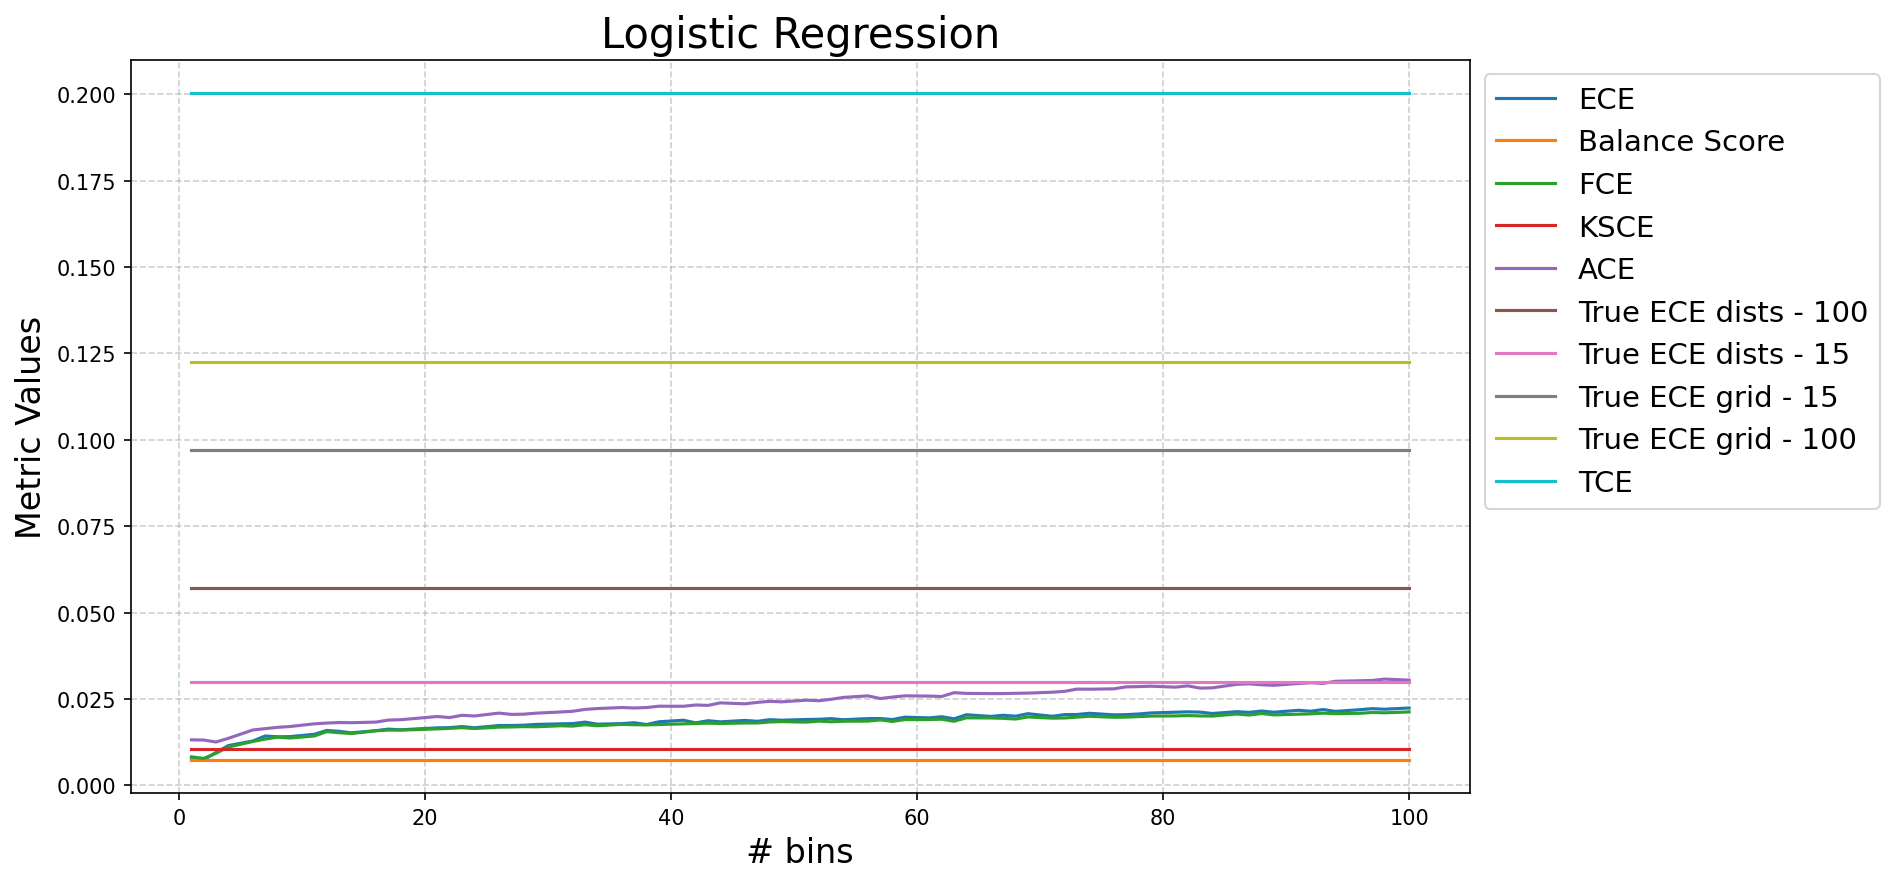

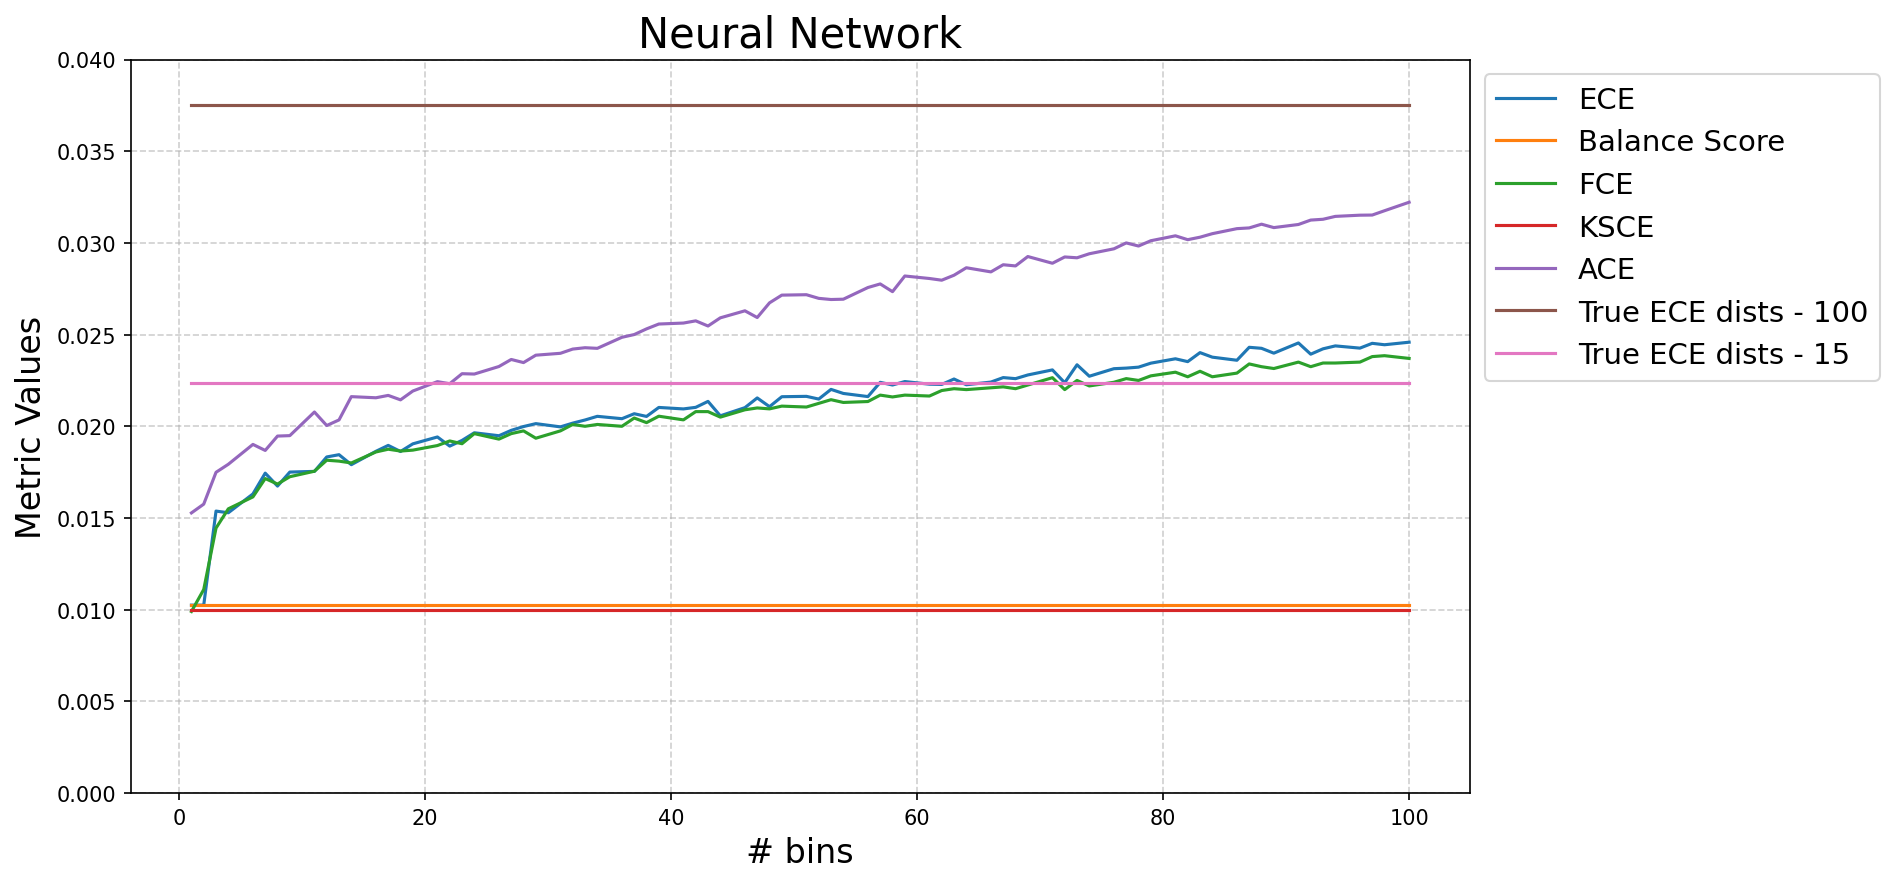

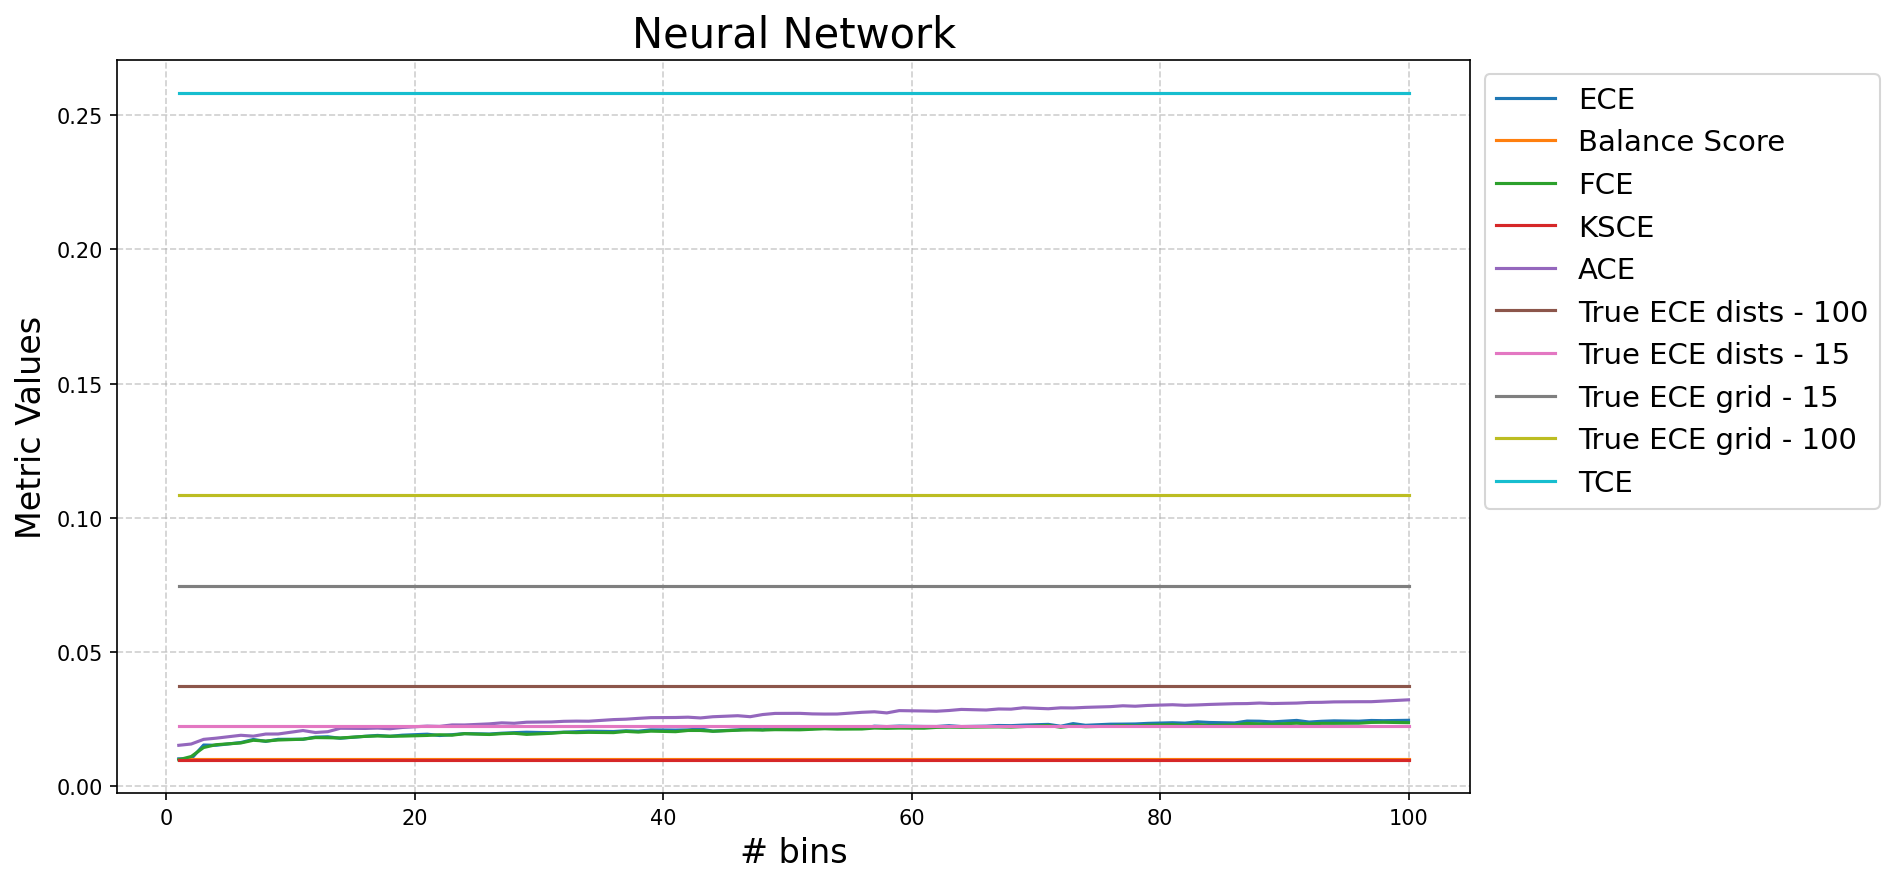

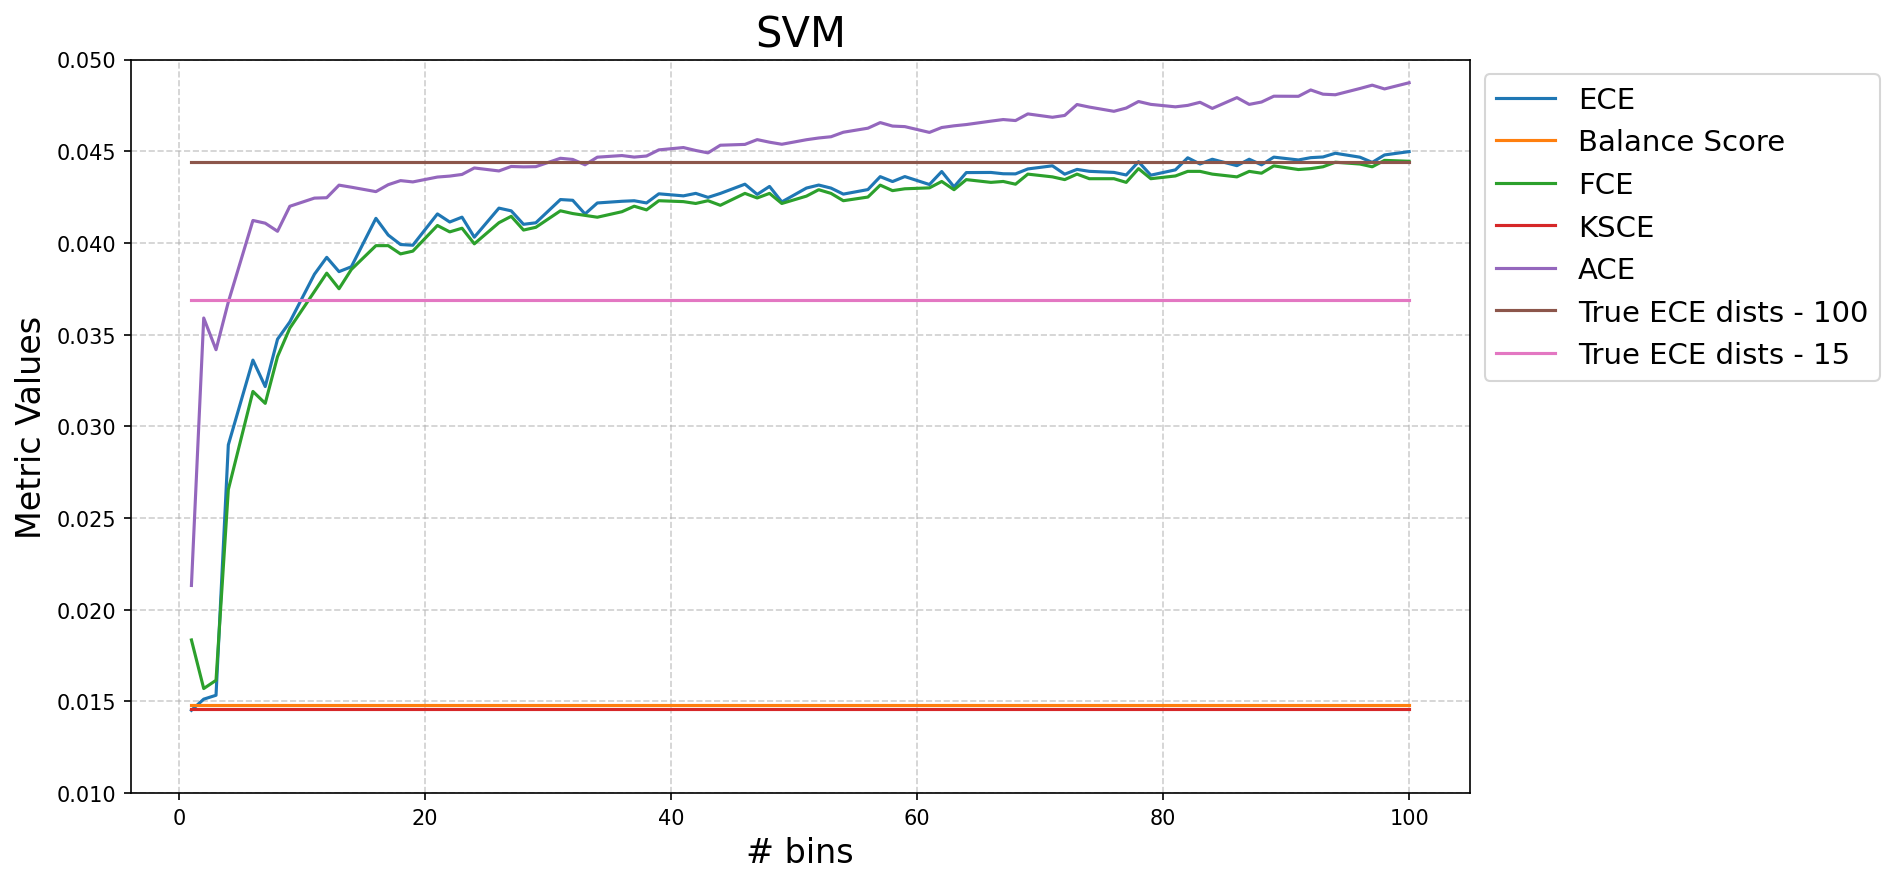

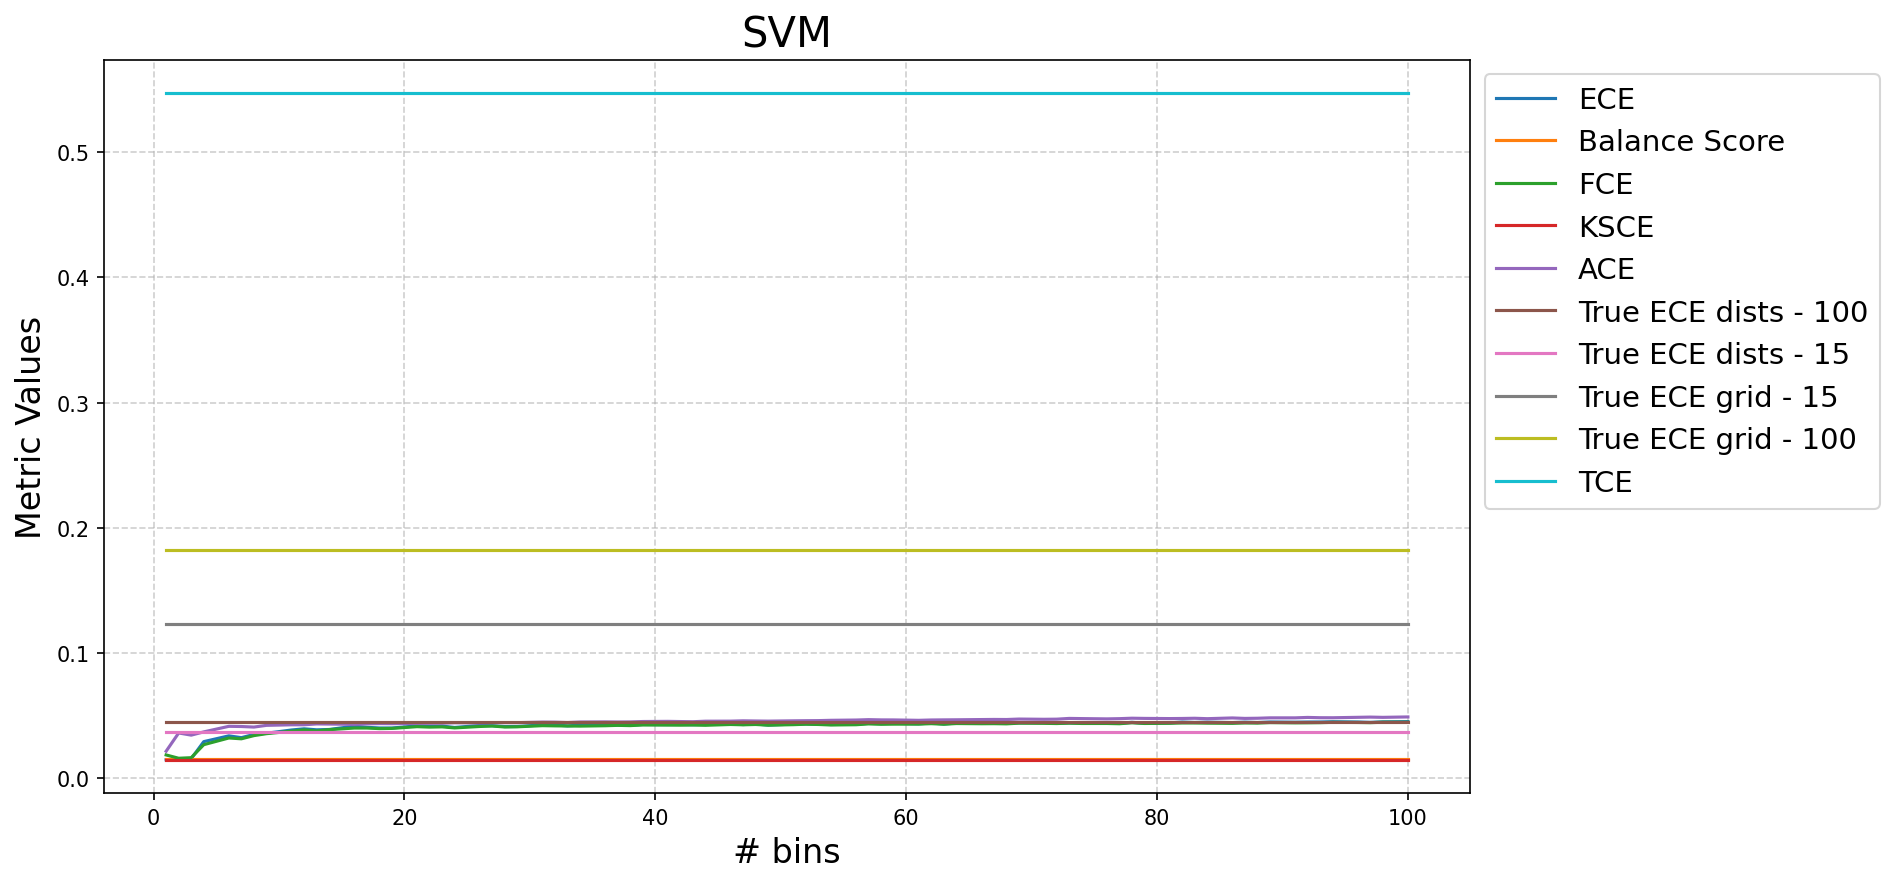

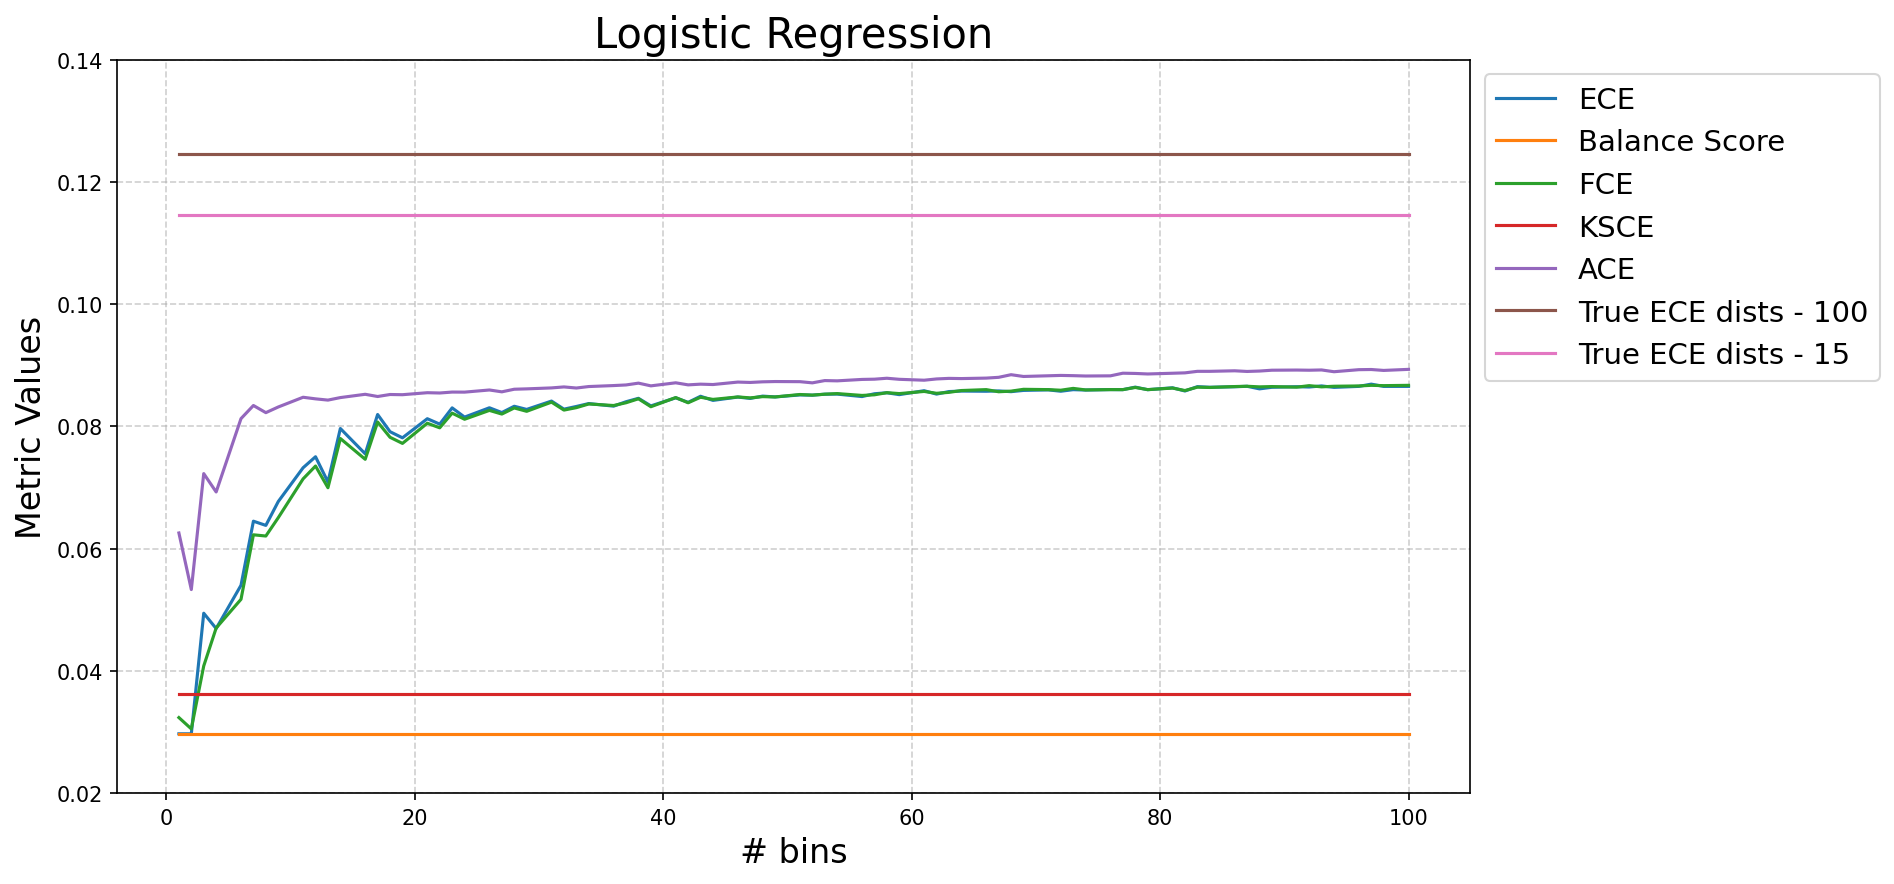

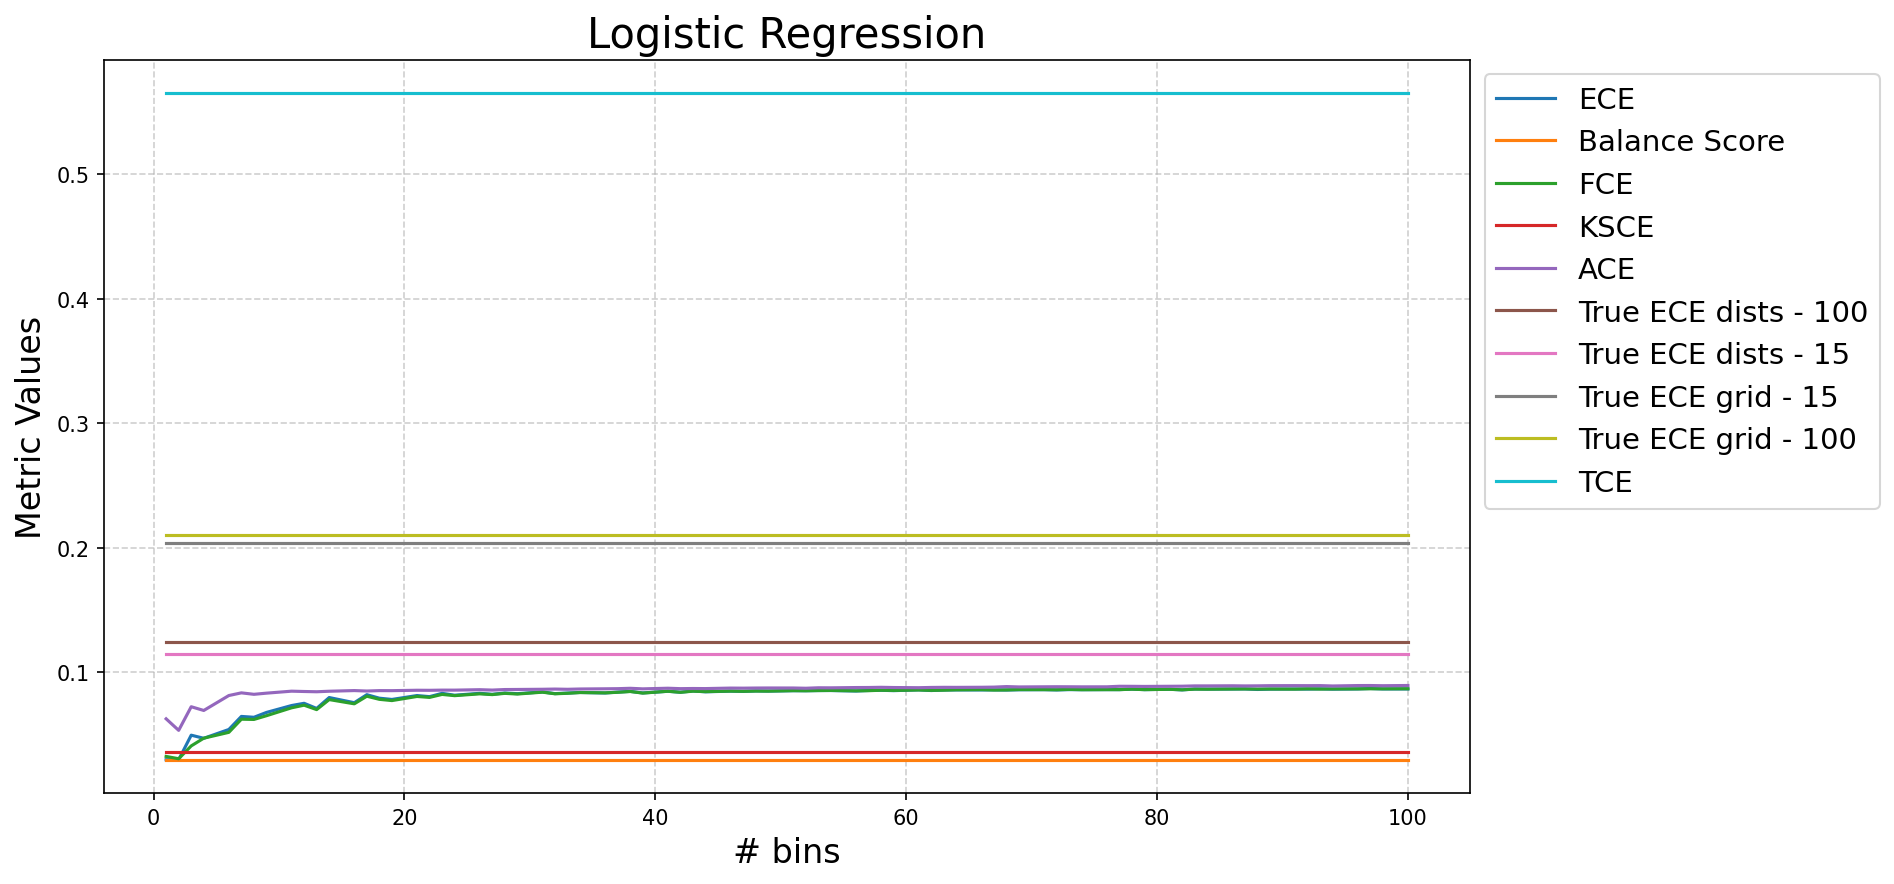

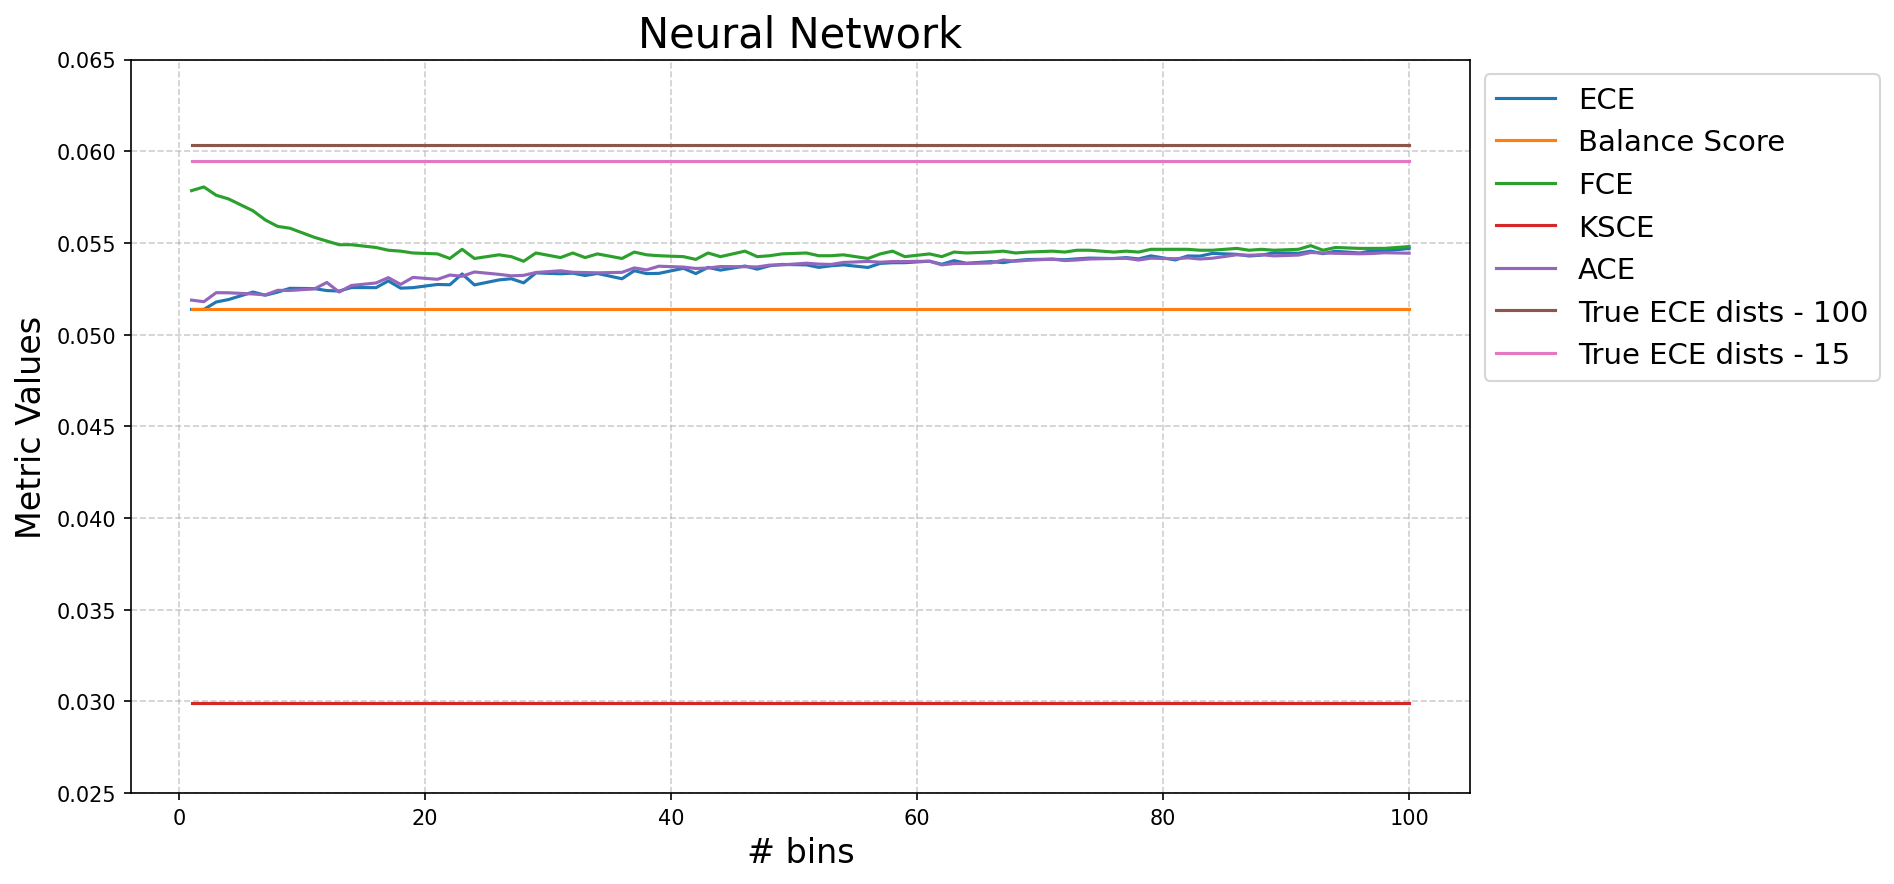

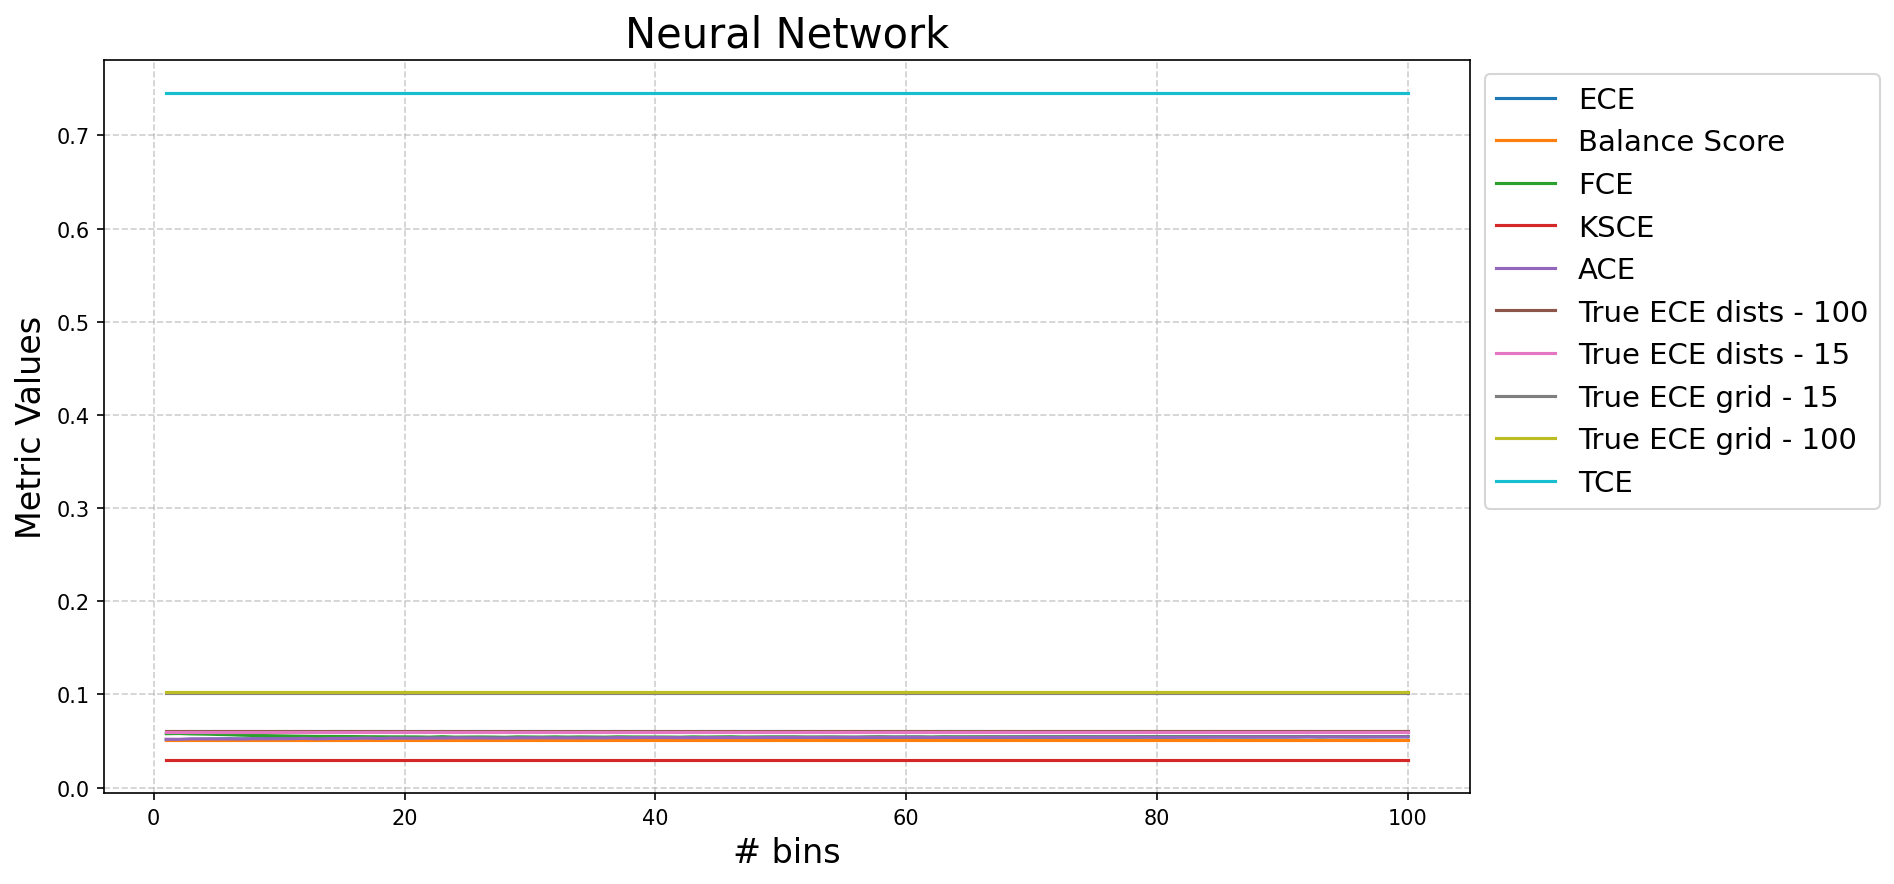

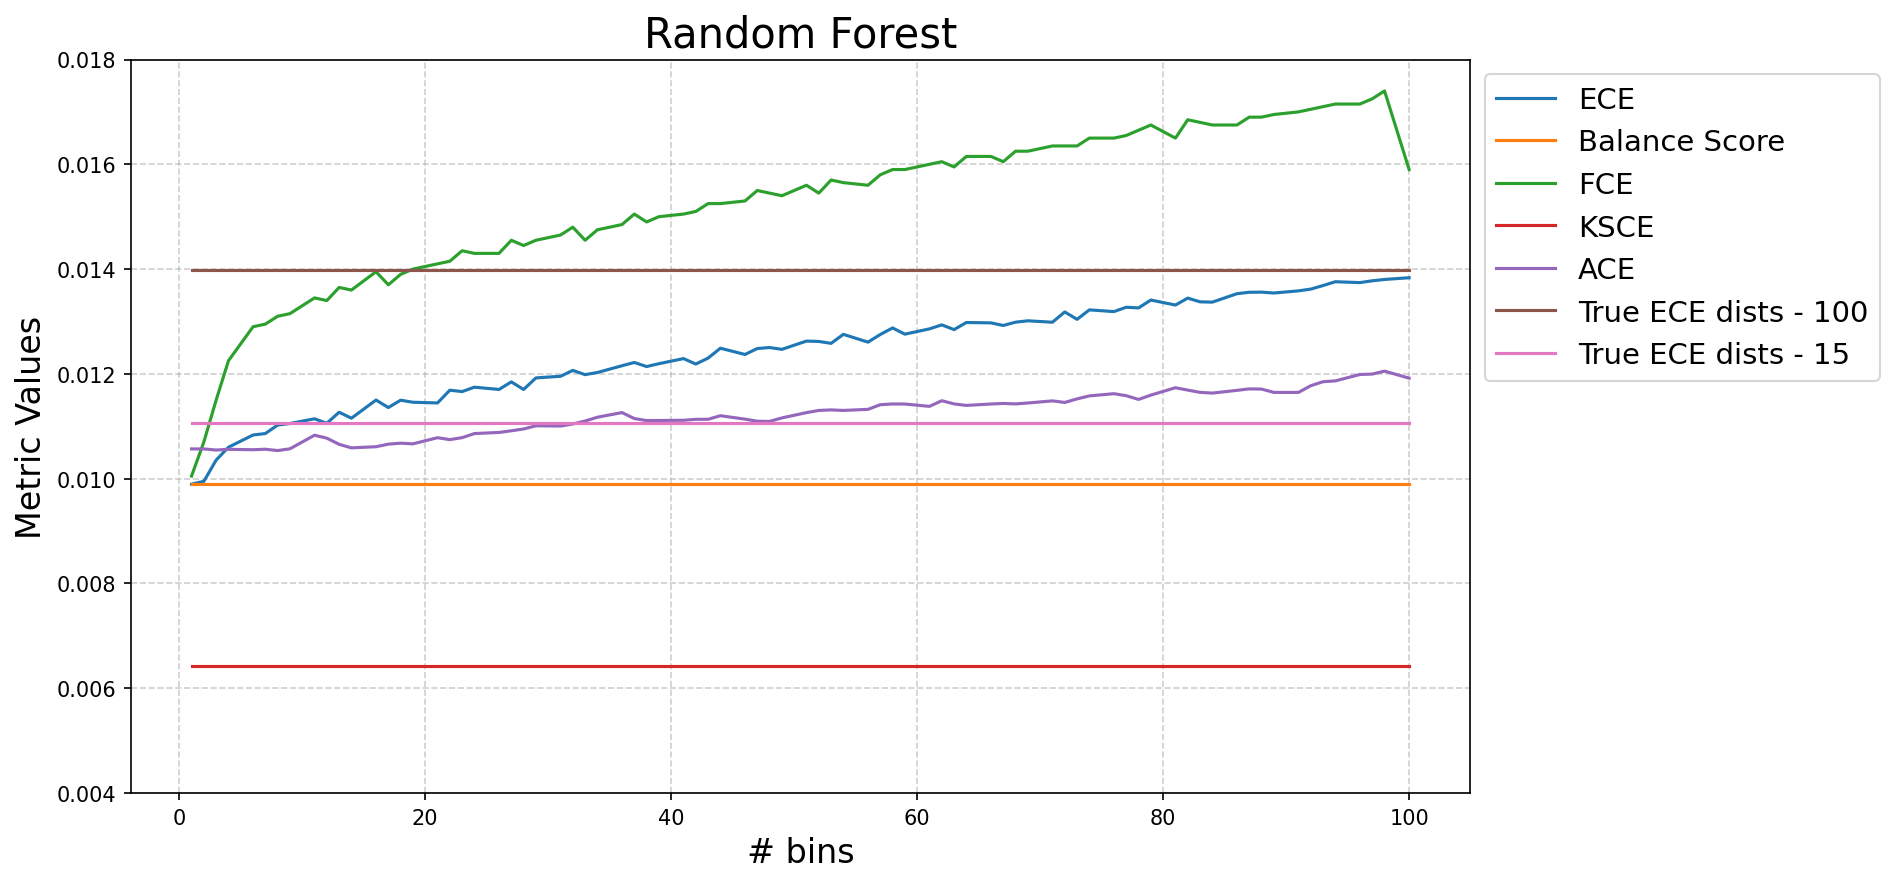

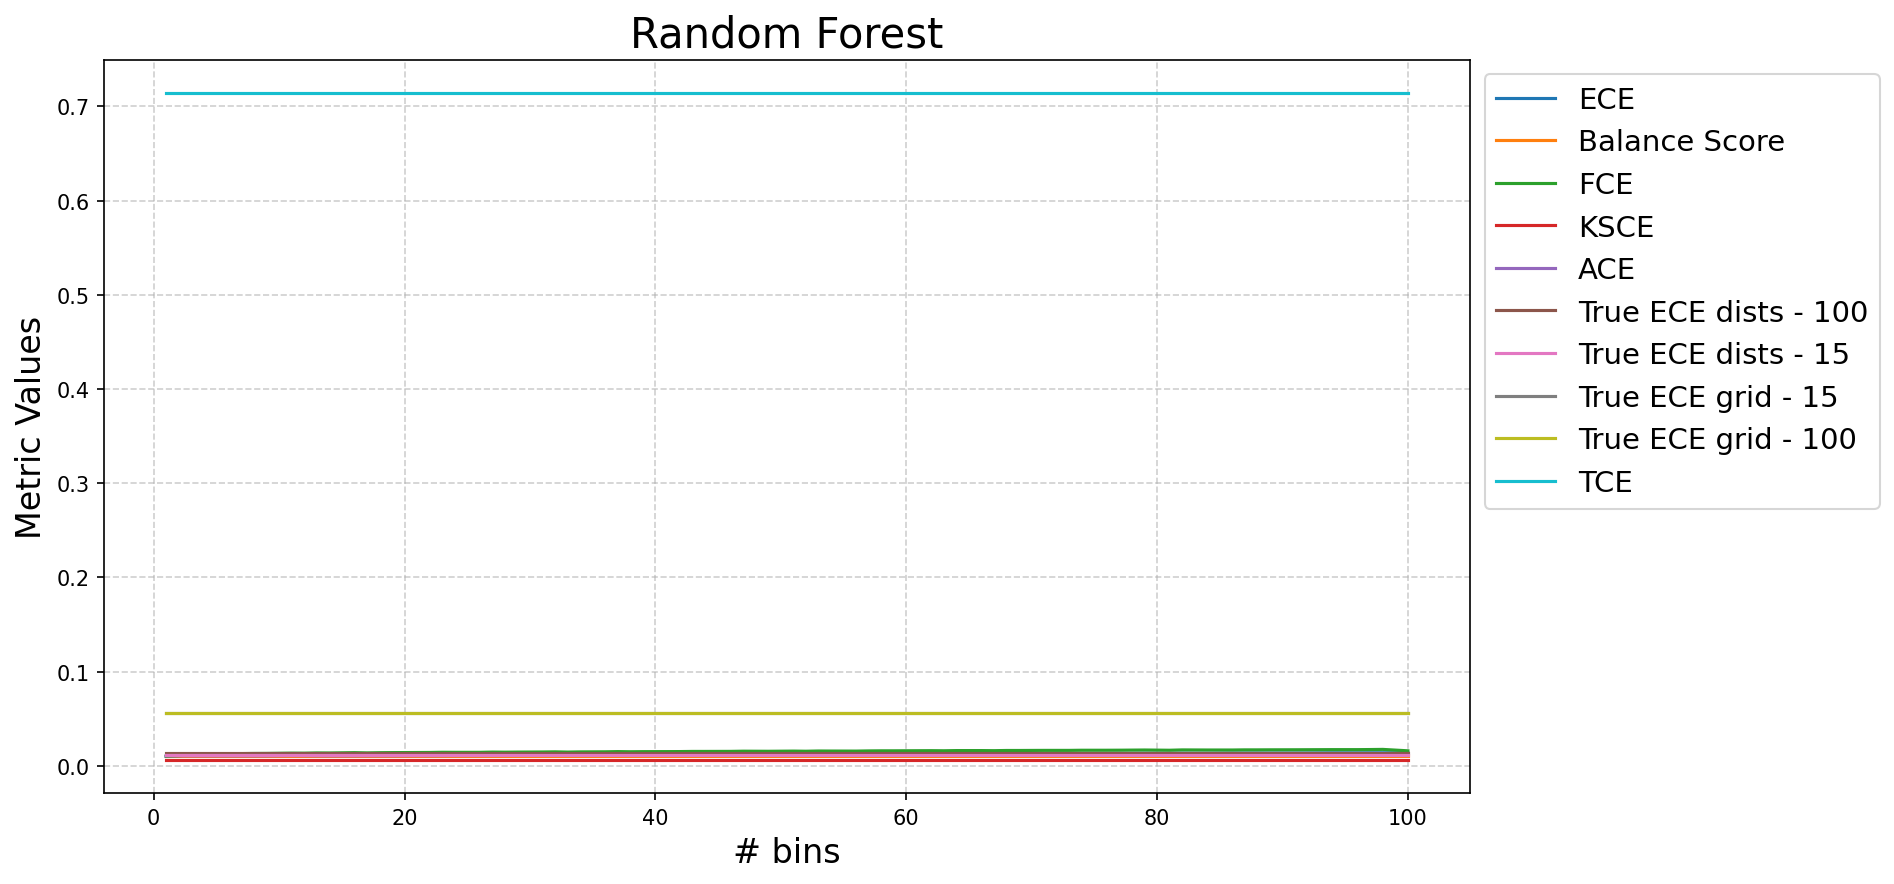

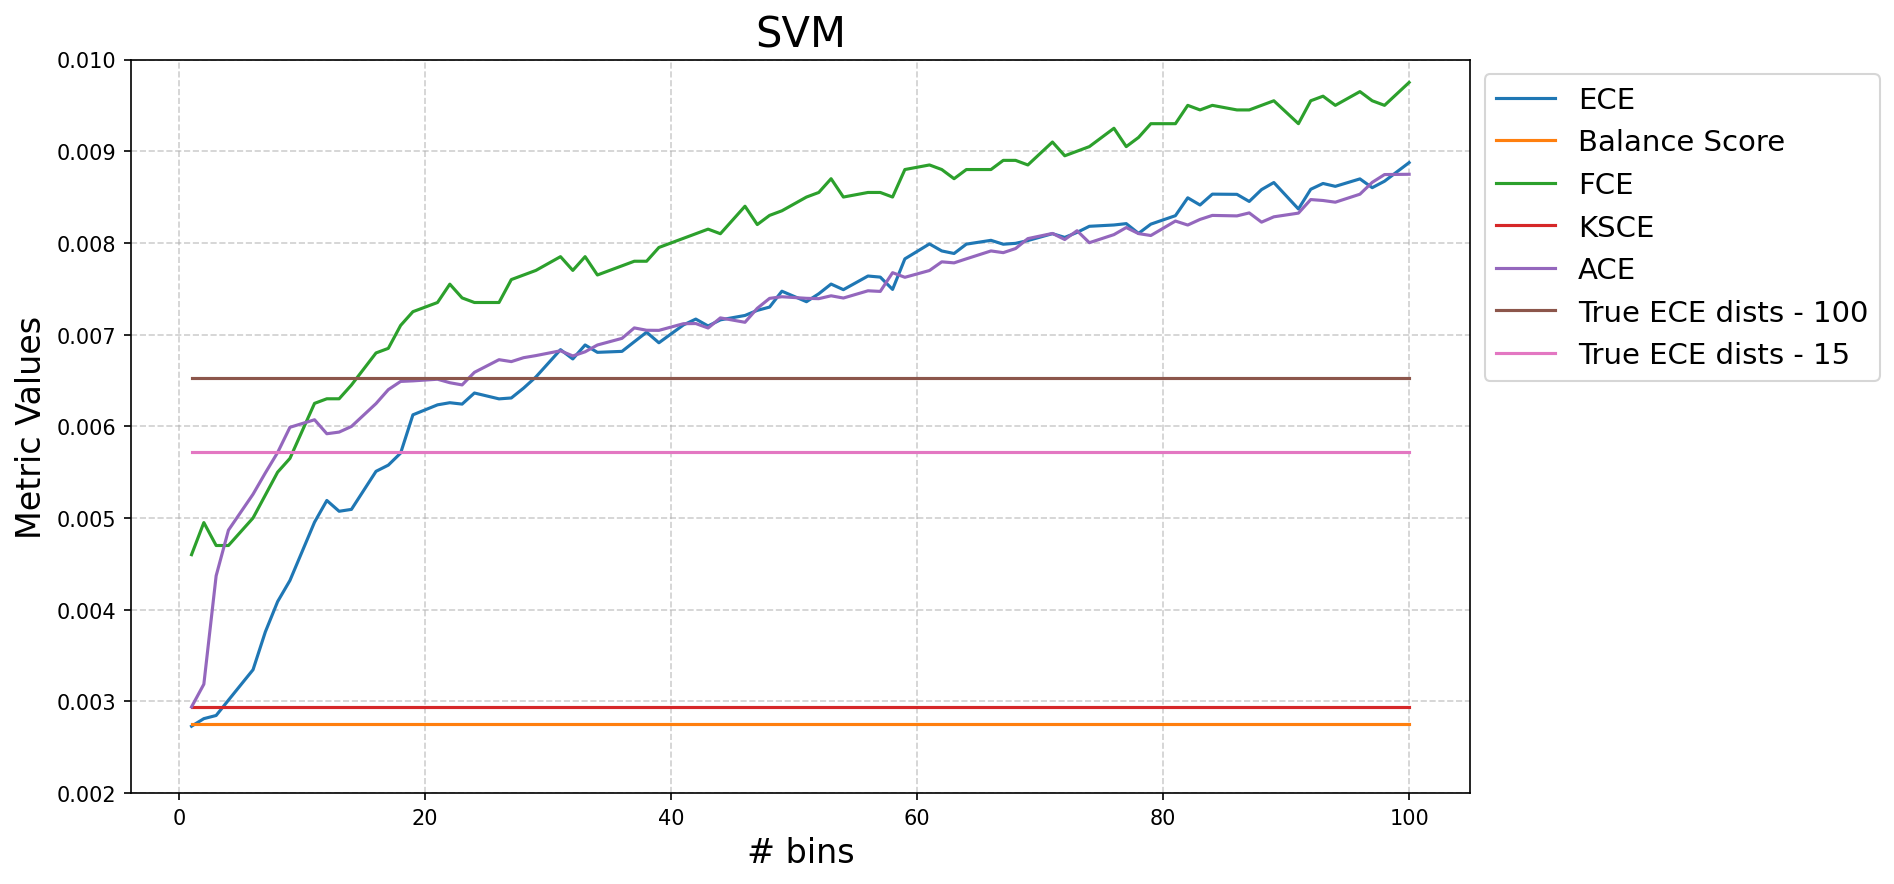

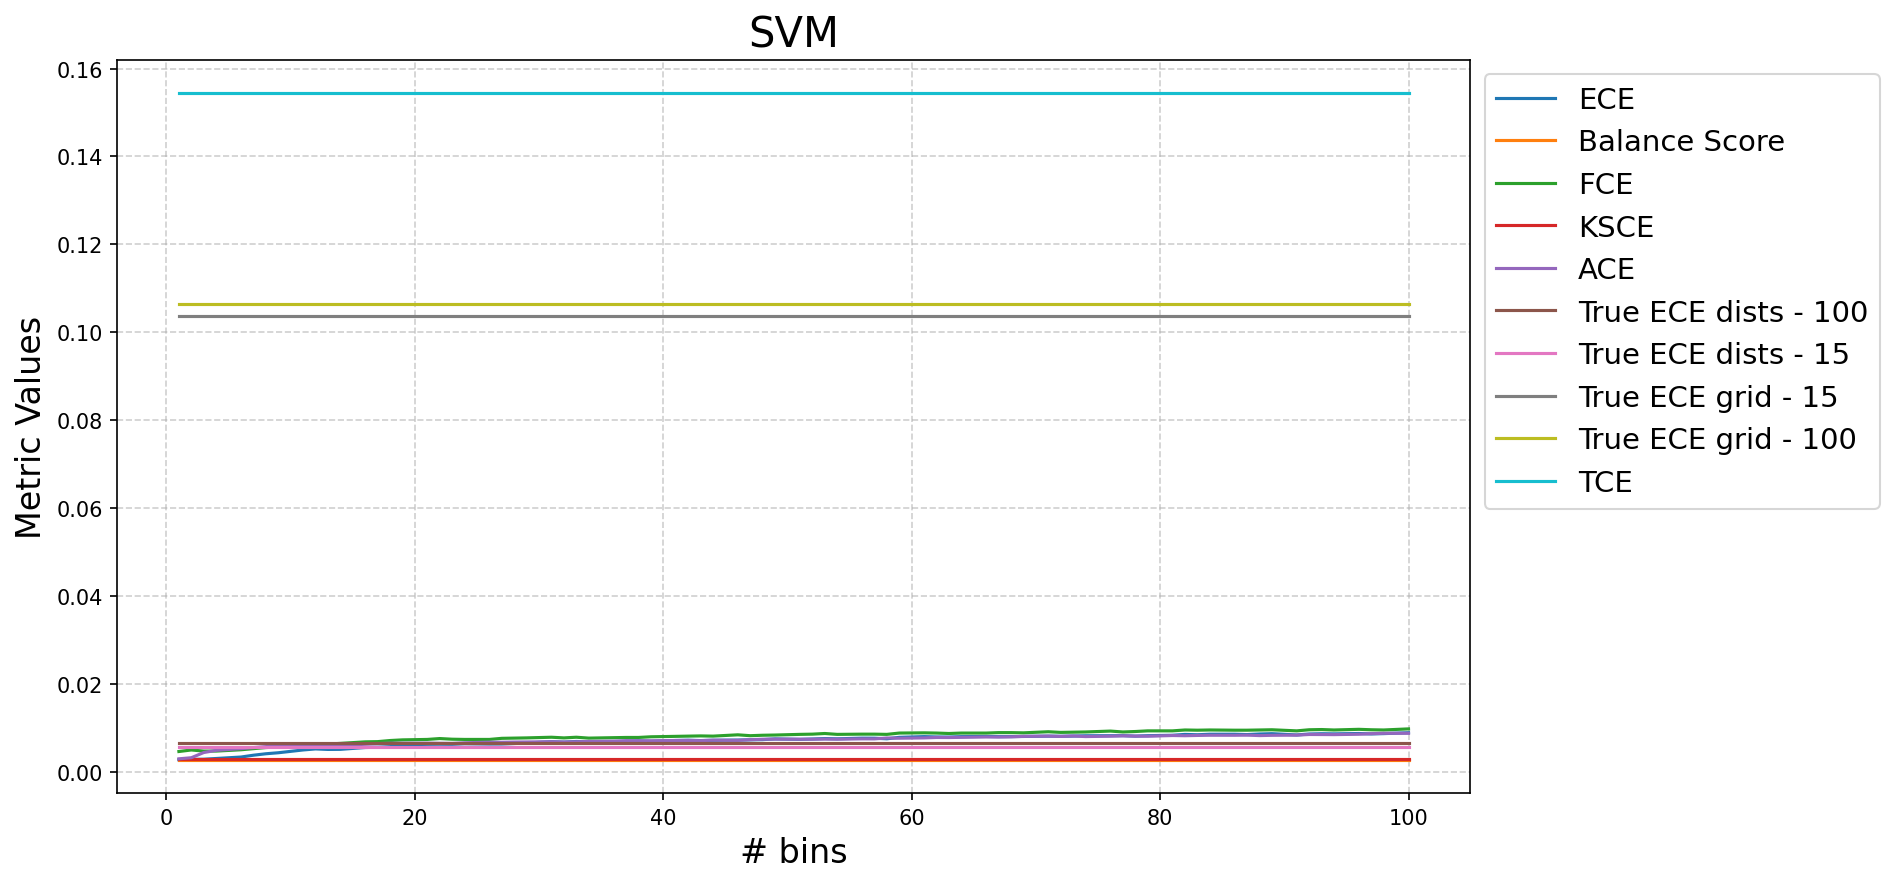

In [25]:

for i, filename in enumerate(filenames):
    with (open(f'./data/{filename}', 'rb') as file):
        results = pickle.load(file)
    
    # Extract data
    bins = results["Binss"]
    means = results["Means"]
    std_devs = results["Std Devs"]
    
    # infer model and dataset
    model = "SVM" if "SVM" in filename else ("Neural Network" if "Neural Network" in filename else ("Logistic Regression" if "Logistic Regression" in filename else ("Random Forest" if "Random Forest" in filename else "Unknown")))
    dataset = "gummy_worm_family" if "Gummy Worm" in filename else "exclamation_mark_family"

    ### Plotting Mean and Std Deviation (zoomed) #
    print("   Plotting...")
    fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
    
    for metric in means.keys():
        if metric != "TCE" and metric != "Accuracy" and metric != "True ECE Grid (Binned - 15 Bins)" and metric != "True ECE Grid (Binned - 100 Bins)":
            ax.plot(bins, means[metric], label=metric.replace("Dists", "dists").replace("(Binned ", "").replace(" Bins)", ""))
    
    
    if should_plot_true_ece_grid_15[i]:
        ax.plot(bins, means["True ECE Grid (Binned - 15 Bins)"], label="True ECE grid - 15")
    if should_plot_true_ece_grid_100[i]:
        ax.plot(bins, means["True ECE Grid (Binned - 100 Bins)"], label="True ECE grid - 100")
    if should_plot_tce[i]:
        ax.plot(bins, means["TCE"], label="TCE")
    
    plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.25)
    plt.xlabel('# bins', fontsize=16)
    plt.ylabel('Metric Values', fontsize=16)
    plt.title(model, fontsize=20)
    plt.tight_layout()
    plt.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
    plt.ylim(y_lims[i][0], y_lims[i][1])
    ax.grid(True, linestyle='--', alpha=0.6)
    
    plt.savefig(f'./plots/{model}_{dataset}_zoomed.png', bbox_inches='tight')
    
    
    
    ### Plotting Mean and Std Deviation (full) #
    print("   Plotting...")
    fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
    
    for metric in means.keys():
        if metric != "TCE" and metric != "Accuracy" and metric != "True ECE Grid (Binned - 15 Bins)" and metric != "True ECE Grid (Binned - 100 Bins)":
            ax.plot(bins, means[metric], label=metric.replace("Dists", "dists").replace("(Binned ", "").replace(" Bins)", ""))
            #ax.fill_between(bins, np.array(means[metric]) - np.array(std_devs[metric]),
                               #np.array(means[metric]) + np.array(std_devs[metric]), alpha=0.2)
    
    ax.plot(bins, means["True ECE Grid (Binned - 15 Bins)"], label="True ECE grid - 15")
    ax.plot(bins, means["True ECE Grid (Binned - 100 Bins)"], label="True ECE grid - 100")
    ax.plot(bins, means["TCE"], label="TCE")
        
        
    plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.25)
    plt.xlabel('# bins', fontsize=16)
    plt.ylabel('Metric Values', fontsize=16)
    plt.title(model, fontsize=20)
    plt.tight_layout()
    plt.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(True, linestyle='--', alpha=0.6)
    
    plt.savefig(f'./plots/{model}_{dataset}_full.png', bbox_inches='tight')